In [ ]:
!nvidia-smi

Sat Mar 25 01:27:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
!git clone https://github.com/SkalskiP/yolov7.git
%cd yolov7
!git checkout fix/problems_associated_with_the_latest_versions_of_pytorch_and_numpy
!pip install -r requirements.txt

Cloning into 'yolov7'...
remote: Enumerating objects: 579, done.
remote: Total 579 (delta 0), reused 0 (delta 0), pack-reused 579
Receiving objects: 100% (579/579), 38.53 MiB | 939.00 KiB/s, done.
Resolving deltas: 100% (281/281), done.
/Users/tanishsingh/Downloads/yolov7


In [3]:
#to download pretrained weights
%cd /Users/tanishsingh/Downloads/yolov7
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7_training.pt

/Users/tanishsingh/Downloads/yolov7


In [ ]:
import torch
torch.cuda.empty_cache()
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [ ]:
# run this cell to begin training
%cd /content/yolov7
!python train.py --batch 16 --epochs 150 --cfg cfg/training/yolov7.yaml --data /Users/tanishsingh/Downloads/PKLot-2/data.yaml --weights 'yolov7_training.pt' --device 0


In [14]:
#evaluation dataset
# Run evaluation
! python detect.py --weights /Users/tanishsingh/Downloads/best_253.pt  --source /Users/tanishsingh/Downloads/Parking-bays.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/Users/tanishsingh/Downloads/Parking-bays.jpg', update=False, view_img=False, weights=['/Users/tanishsingh/Downloads/best_253.pt'])
YOLOR 🚀 8e9f0b7 torch 1.11.0.post2 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/opt/homebrew/Caskroom/miniforge/base/envs/yolov7_pklot/lib/python3.8/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /Users/runner/miniforge3/conda-bld/pytorch-recipe_1654951087670/work/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36487166 parameters, 6194944 g

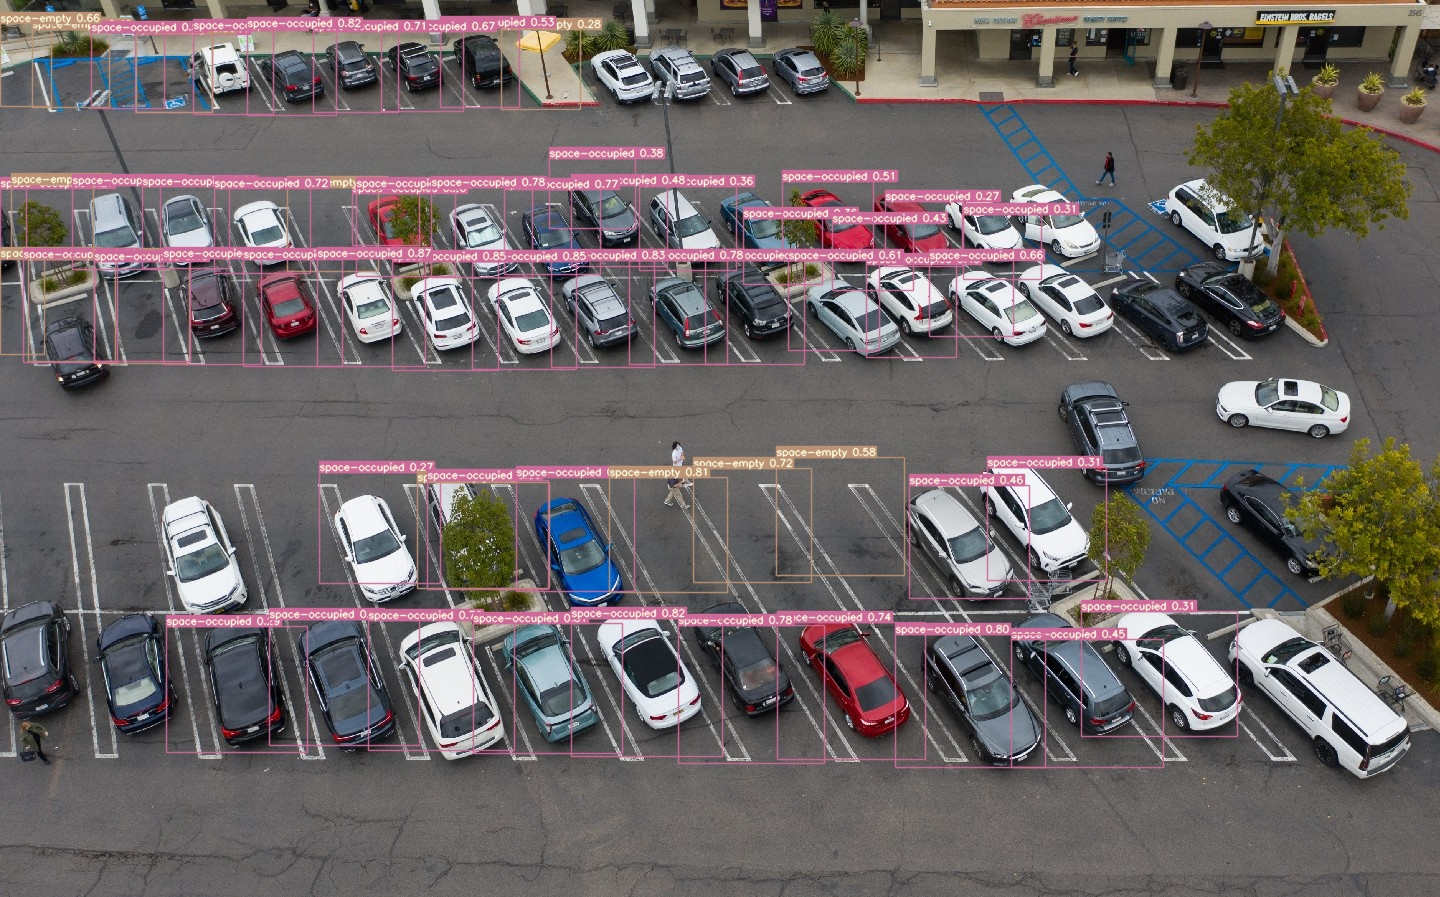

In [16]:

from IPython import display
display.Image("/Users/tanishsingh/Downloads/yolov7/runs/detect/exp2/Parking-bays.jpg")